<a href="https://colab.research.google.com/github/sudhirswani/lendingClubCaseStudy/blob/master/lendingClubCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [129]:
#Import the dataset
df = pd.read_csv('https://raw.githubusercontent.com/sudhirswani/lendingClubCaseStudy/refs/heads/master/loan/loan.csv')

In [130]:
#Checking shape
df.shape

(39717, 111)

In [131]:
# Drop columns which does not hold any information
drop_cols = []
for i in df.columns:
    if df[i].nunique() == 0:
        drop_cols.append(i)
df = df.drop(columns=drop_cols)

# Drop columns which holds only single value as it will not affect analysis
drop_cols = []
for i in df.columns:
    if df[i].nunique() == 1:
        drop_cols.append(i)
df = df.drop(columns=drop_cols)

In [132]:
# Check df.info() after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

### Data Understanding
Since we want to find variables of loan that indicate loan default,
Following columns does not make sense for analysis

* id: unique to each row
* member_id: unique to each row
* emp_title: since this is the title
* issue_d: since this is date
* url: unique to each row
* desc: only required for sentimental analysis
* title: since this is title
* zip_code: since zip code does not affect analysis
* earliest_cr_line: This does not indicate defaults
* mths_since_last_record: Most of the data is not available
* out_prncp: outstanding principals are present only for current loans
* out_prncp_inv: outstanding principals are present only for current loans
* total_rec_prncp: Recovery principal doesn't seem to affect analysis
* total_rec_int: Recovery interest doesn't seem to affect analysis
* total_rec_late_fee : Recovery late fee doesn't seem to affect analysis
* recoveries: post charge-off recovery amount doesn't seem to affect analysis
* collection_recovery_fee: post charge-off collection fee doesn't seem to affect analysis
* last_pymnt_amnt: This does not seem to affect analysis
* last_pymnt_d: This does not seem to affect analysis
* last_credit_pull_d
* funded_amnt
* funded_amnt_inv

In [134]:
# Check number of unique values per column
df.nunique()

,0
id,39717
member_id,39717
loan_amnt,885
funded_amnt,1041
funded_amnt_inv,8205
term,2
int_rate,371
installment,15383
grade,7
sub_grade,35


In [105]:

# drop columns that are not required for analysis
drop_cols = ['id','member_id','emp_title','issue_d','url','desc','title','zip_code','earliest_cr_line',
             'mths_since_last_record','out_prncp','out_prncp_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
             'collection_recovery_fee','last_pymnt_amnt','last_pymnt_d','next_pymnt_d','last_credit_pull_d','funded_amnt','funded_amnt_inv']
df = df.drop(columns=drop_cols)


In [106]:
# Change column type to numeric by removing strings
pd.set_option('display.max_columns',None)
df['int_rate'] = df['int_rate'].apply(lambda x:float(x[:-1]))
df['term']=df['term'].apply(lambda x:int(x[1:-7]))
df['revol_util'] = df['revol_util'].str.strip('%').astype('float')

In [107]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,1,NaN,3,0,13648,83.7,9,5863.155187,5833.84,0.0
1,2500,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,5,NaN,3,0,1687,9.4,4,1008.710000,1008.71,0.0
2,2400,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,NaN,2,0,2956,98.5,10,3005.666844,3005.67,0.0
3,10000,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,1,35.0,10,0,5598,21.0,37,12231.890000,12231.89,0.0
4,3000,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,OR,17.94,0,0,38.0,15,0,27783,53.9,38,3513.330000,3513.33,0.0


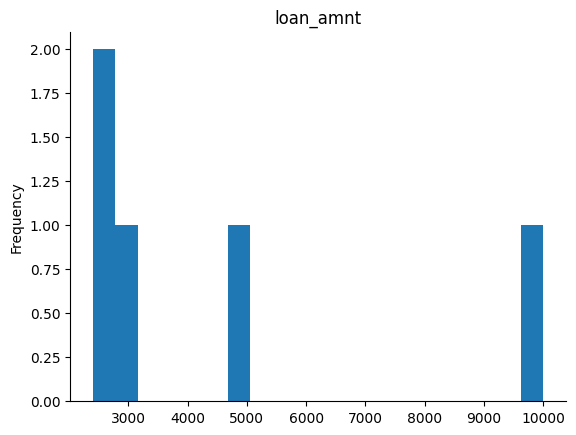

In [108]:
from matplotlib import pyplot as plt
_df_0['loan_amnt'].plot(kind='hist', bins=20, title='loan_amnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [109]:
# Discard rows with loan_status = 'Fully Paid' as they are not required for analysis
df2 = df[~((df['loan_status'] == 'Current'))]

In [110]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   term                    38577 non-null  int64  
 2   int_rate                38577 non-null  float64
 3   installment             38577 non-null  float64
 4   grade                   38577 non-null  object 
 5   sub_grade               38577 non-null  object 
 6   emp_length              37544 non-null  object 
 7   home_ownership          38577 non-null  object 
 8   annual_inc              38577 non-null  float64
 9   verification_status     38577 non-null  object 
 10  loan_status             38577 non-null  object 
 11  purpose                 38577 non-null  object 
 12  addr_state              38577 non-null  object 
 13  dti                     38577 non-null  float64
 14  delinq_2yrs             38577 non-null  int

In [111]:
df2.nunique()

,0
loan_amnt,870
term,2
int_rate,370
installment,15022
grade,7
sub_grade,35
emp_length,11
home_ownership,5
annual_inc,5215
verification_status,3


In [112]:
#categorical_vars = ['term','int_rate','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc','pub_rec',
#                   'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','pub_rec_bankruptcies',
#                   'grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose',
#                   'addr_state','dti']
categorical_vars = ['term','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc','pub_rec',
                   'total_acc','pub_rec_bankruptcies',
                   'grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose',
                   'addr_state']

all_vars = [ ele for ele in df2.columns.tolist() ]
for i in categorical_vars:
    if i in df2.columns.tolist():
        all_vars.remove(i)
numerical_vars = all_vars
numerical_vars

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'revol_bal',
 'revol_util',
 'total_pymnt',
 'total_pymnt_inv']

In [113]:
# Removing outliers from loan amount
df2 = df2[df['annual_inc'] < 20000]

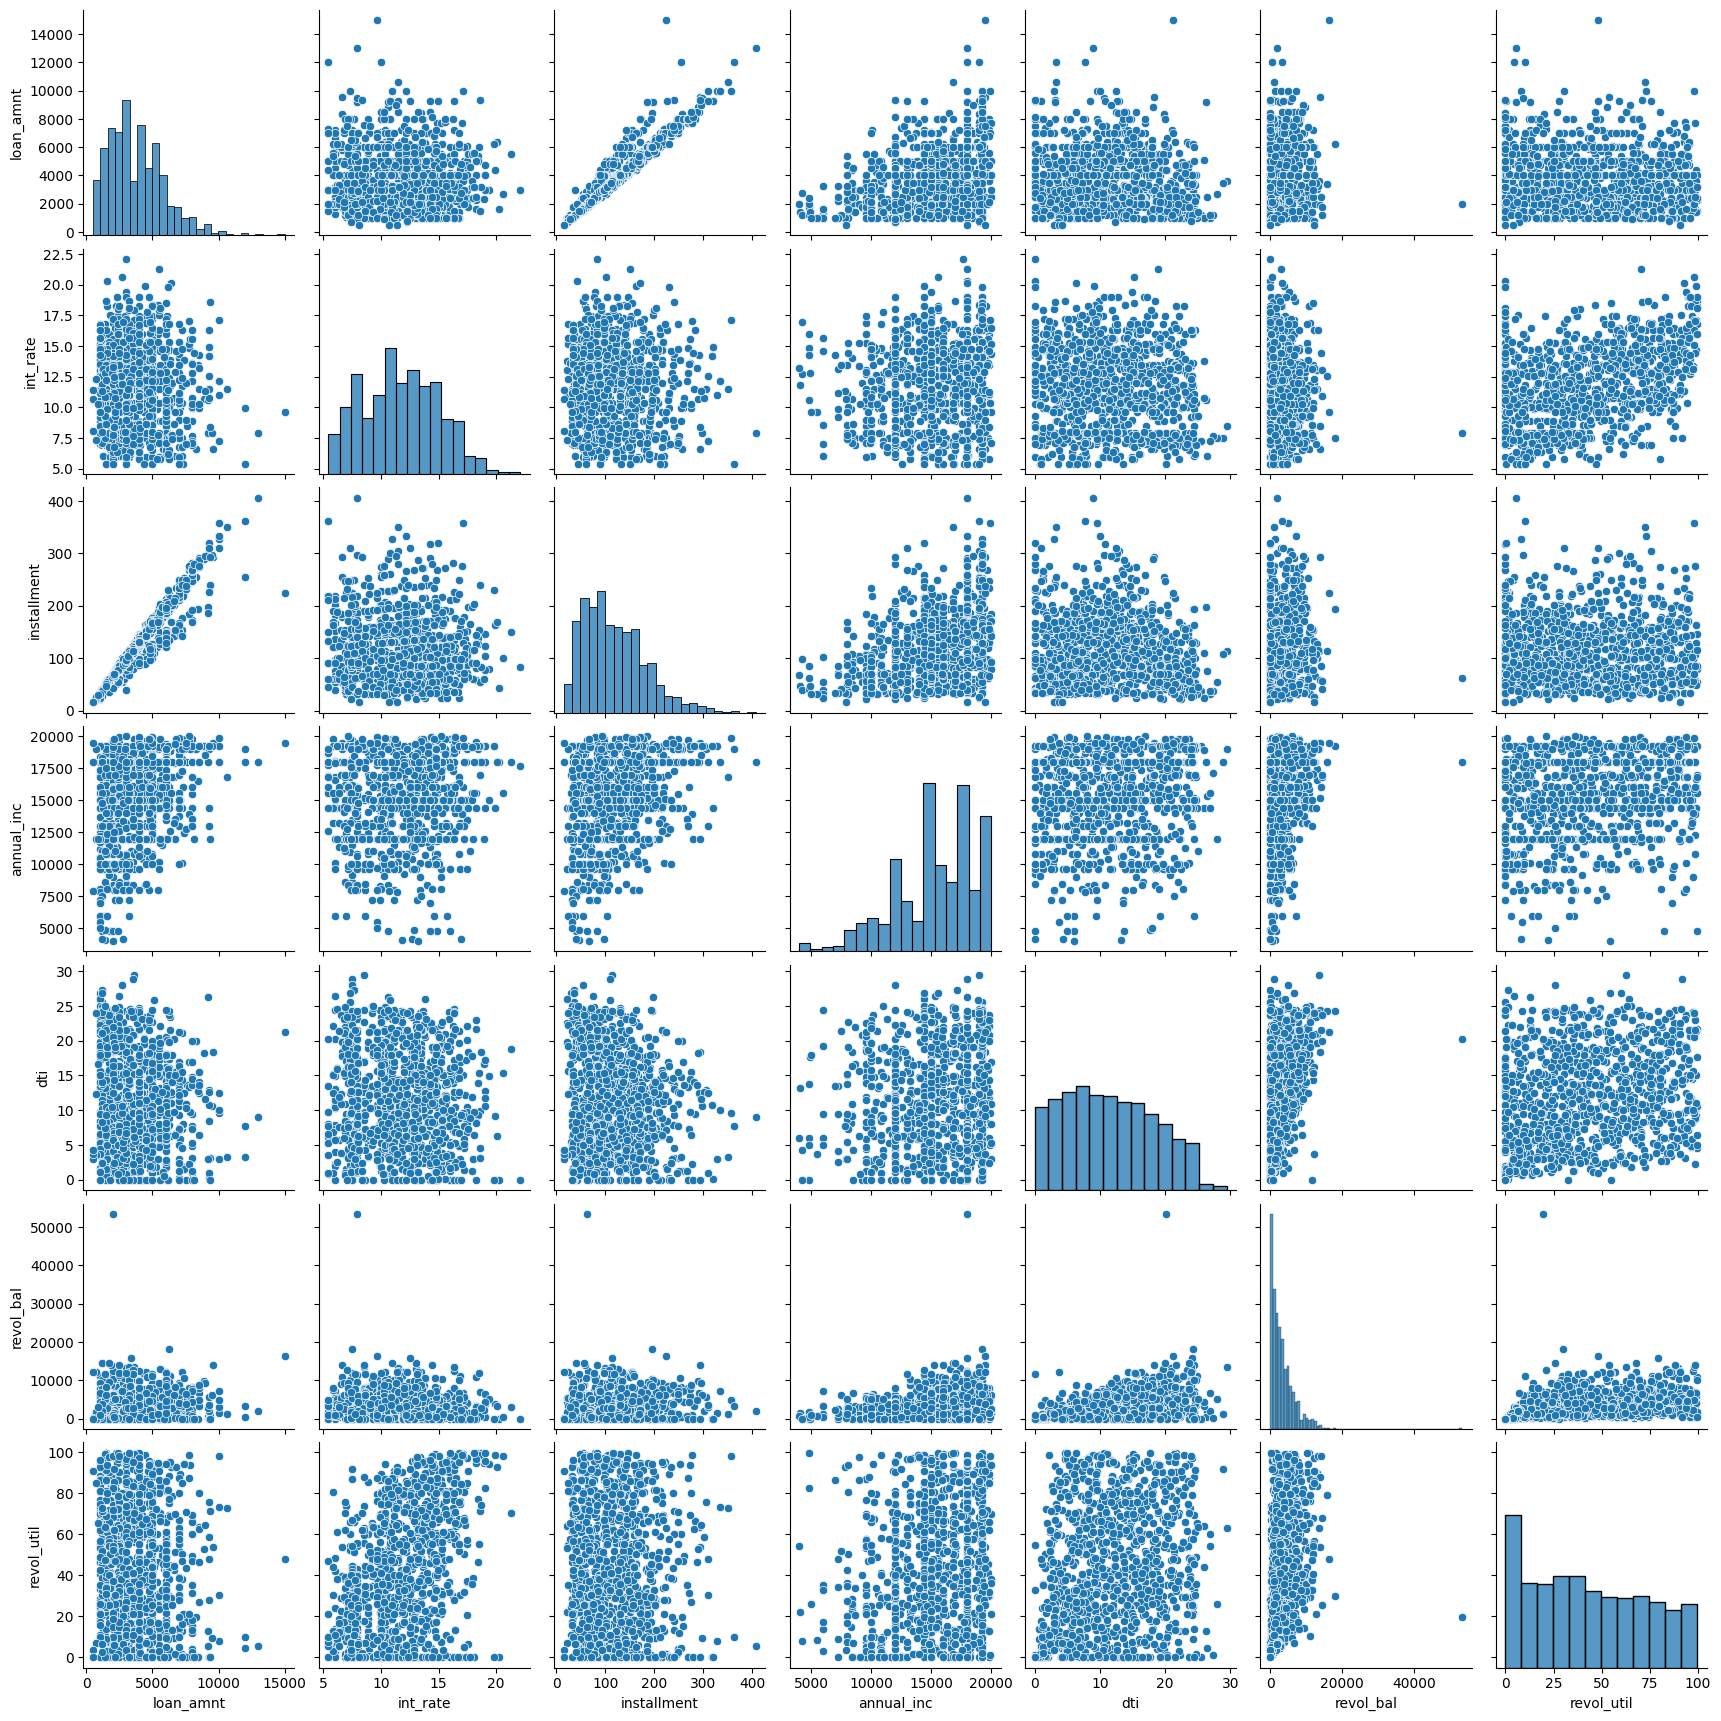

In [114]:
sns.pairplot(df2[['loan_amnt','int_rate','installment','annual_inc','dti','revol_bal','revol_util']])
plt.show()

In [115]:
## Univariate Analysis

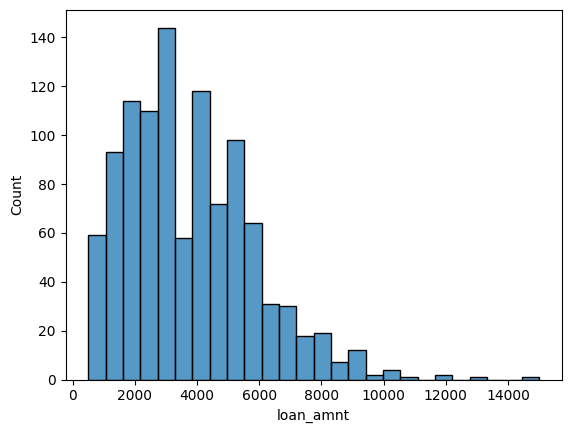

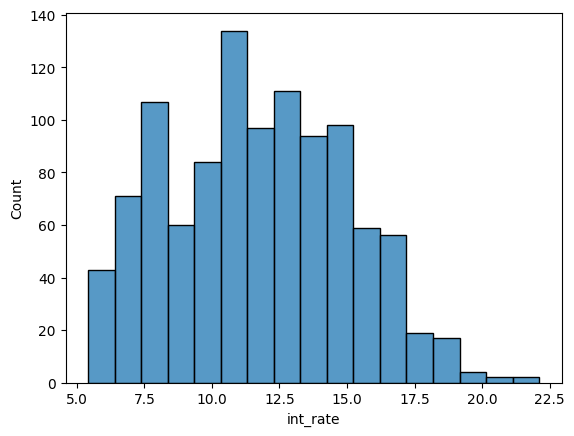

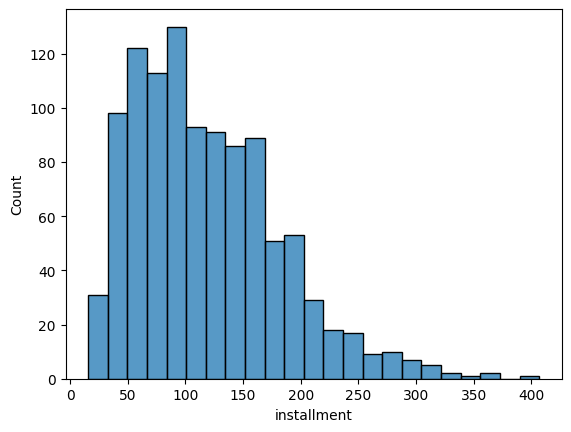

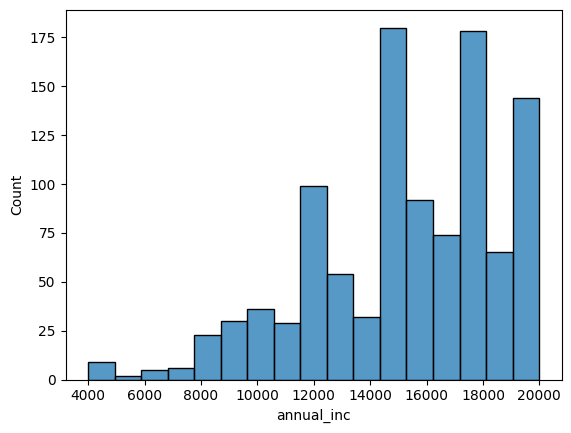

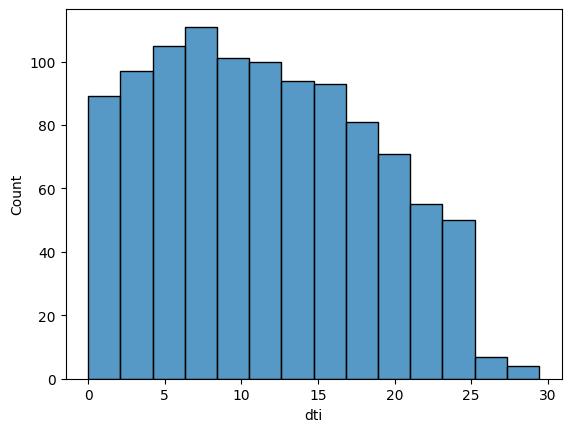

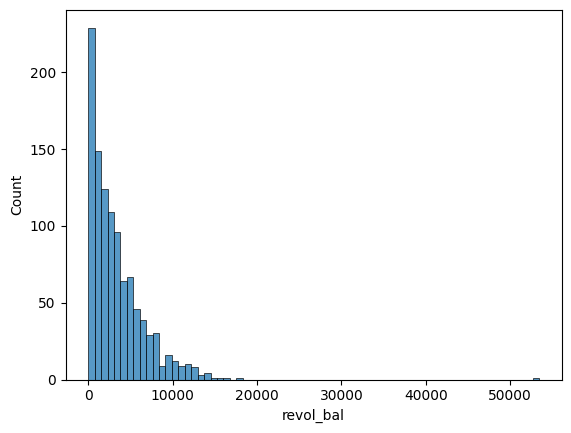

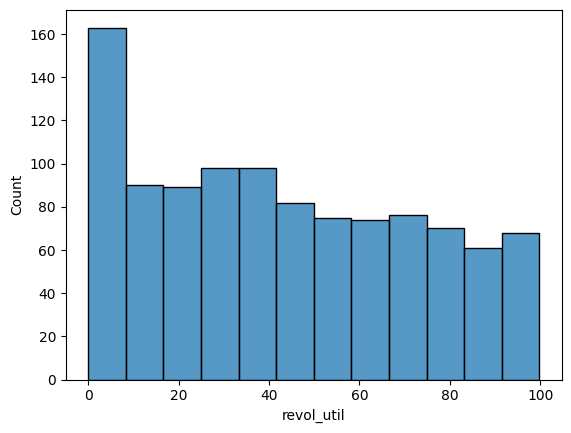

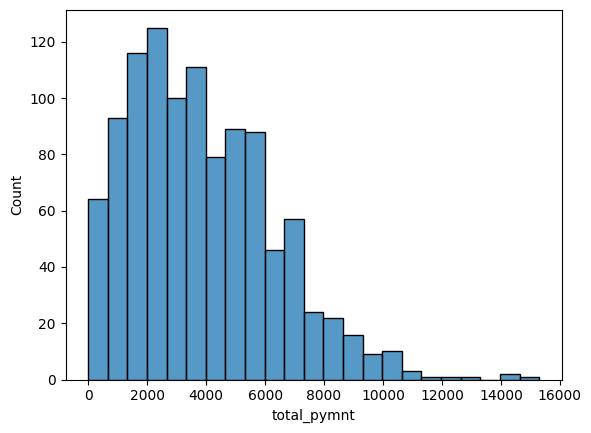

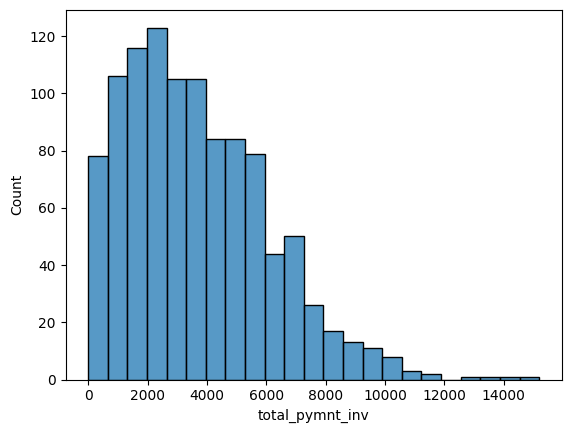

In [116]:
# For all numerical columns plot a histogram
for col in numerical_vars:
    sns.histplot(x=df2[col])
    plt.show()

In [117]:
# Removing outliers from loan amount
df2 = df2[df['loan_amnt'] < 31000]

In [118]:
df2['loan_amnt'].quantile(1)

15000.0

In [119]:
df2['loan_amnt'].describe()

,loan_amnt
count,1058.000000
mean,3777.055766
std,2044.274871
min,500.000000
25%,2150.000000
50%,3475.000000
75%,5000.000000
max,15000.000000


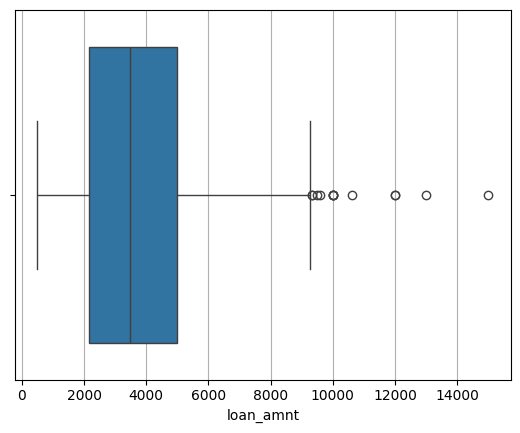

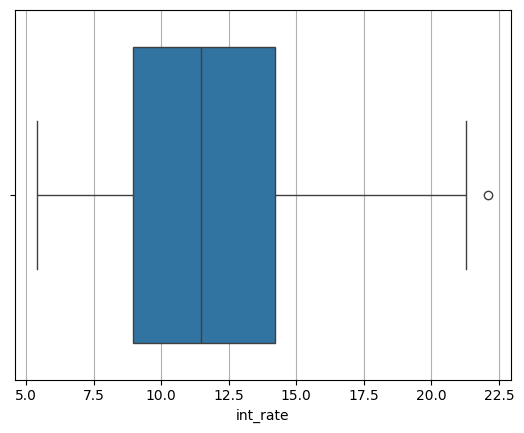

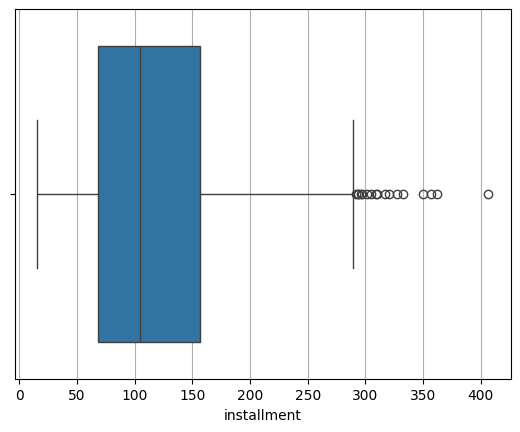

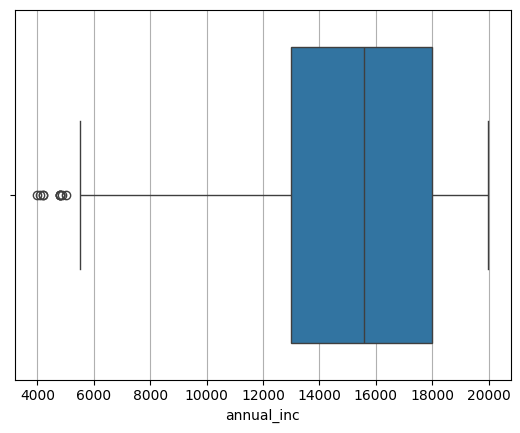

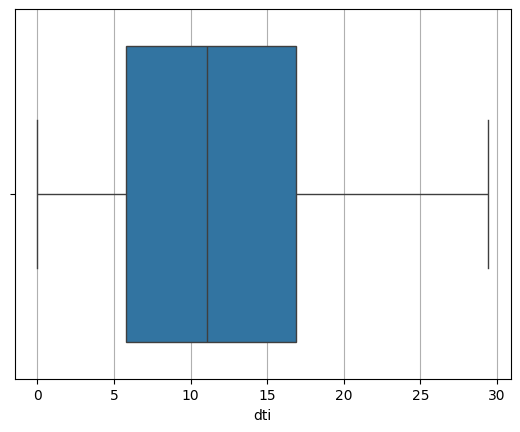

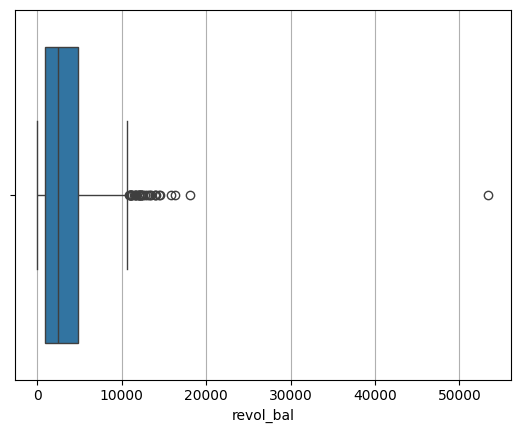

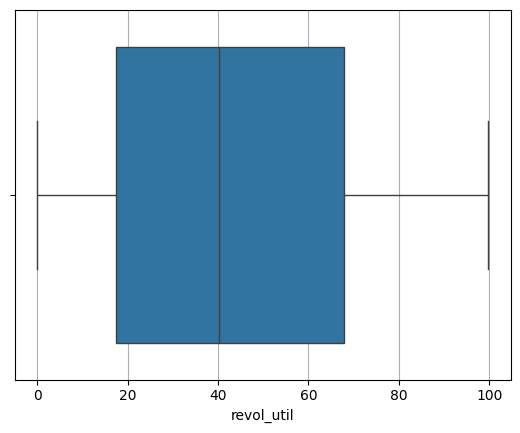

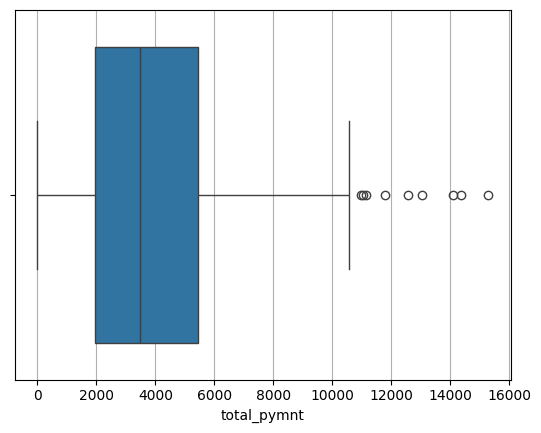

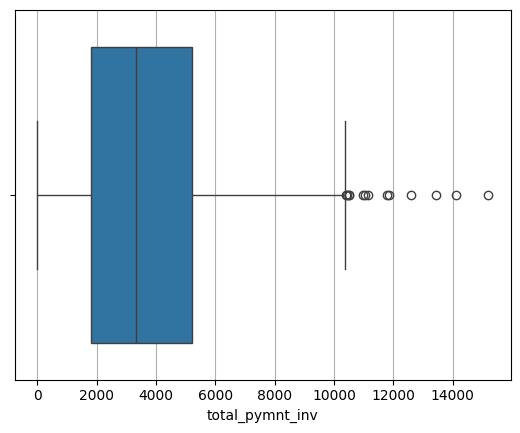

In [120]:
# For all numerical columns plot a boxplot
for col in numerical_vars:
    plt.grid(True,axis='x')
    sns.boxplot(x=df2[col])
    plt.show()

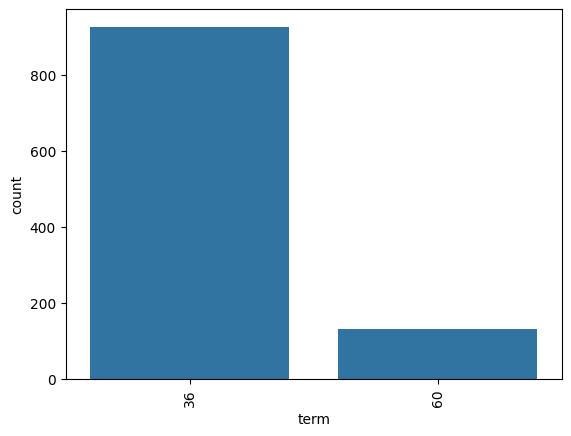

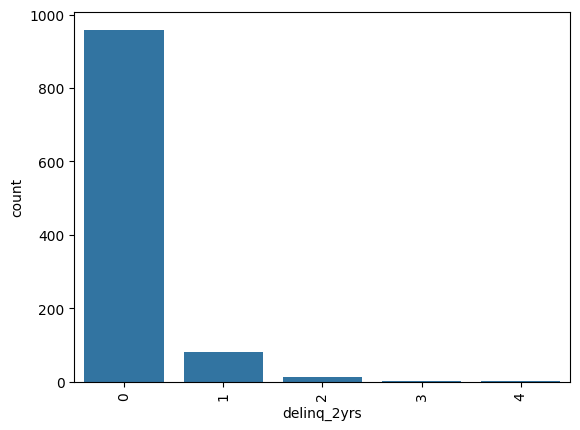

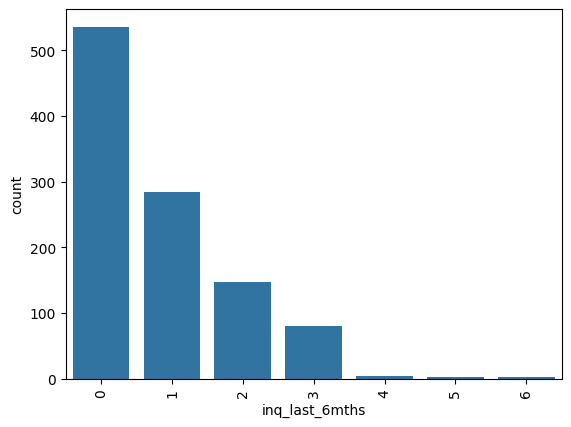

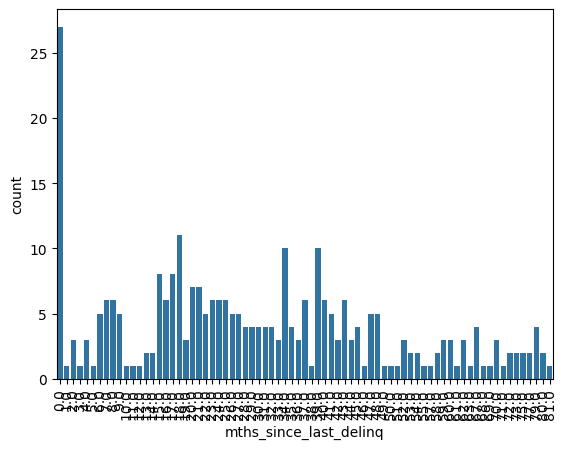

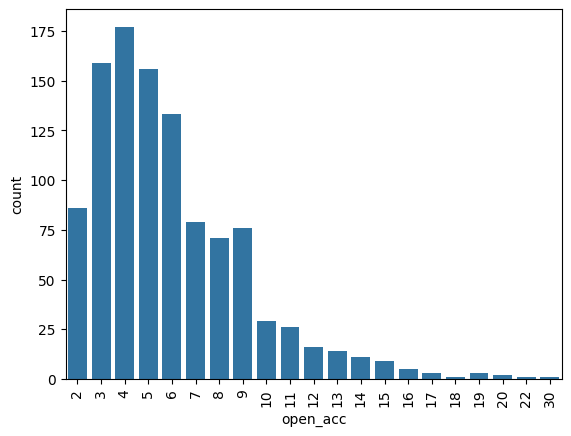

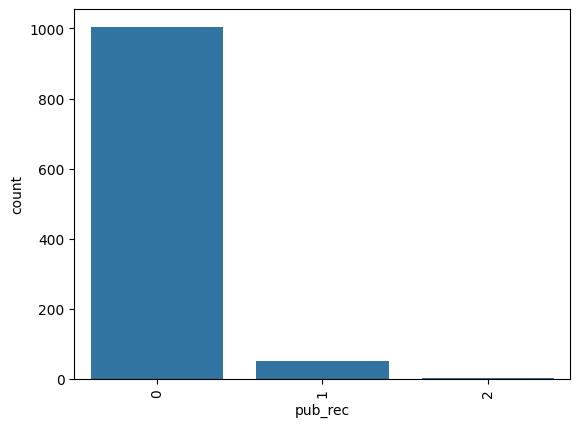

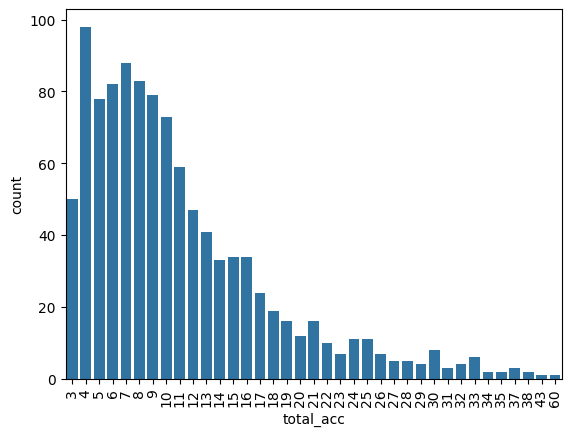

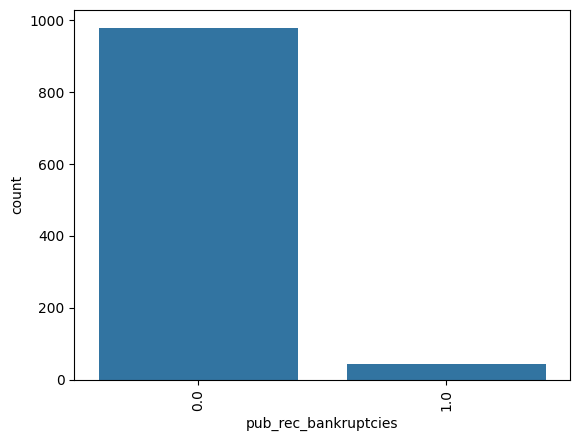

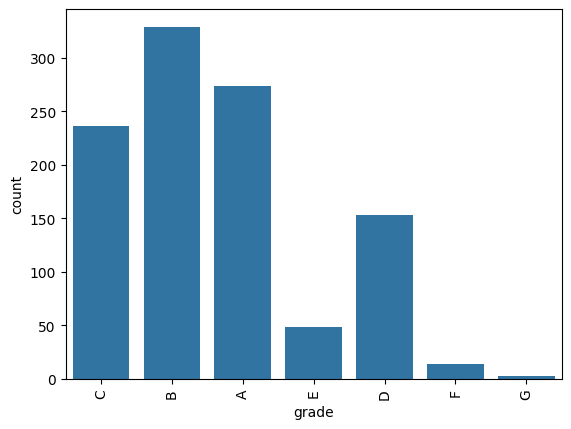

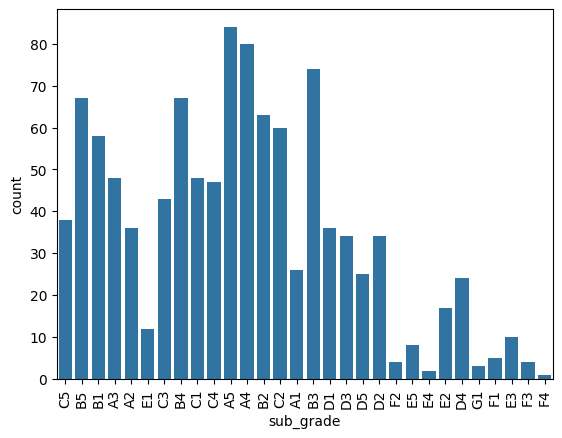

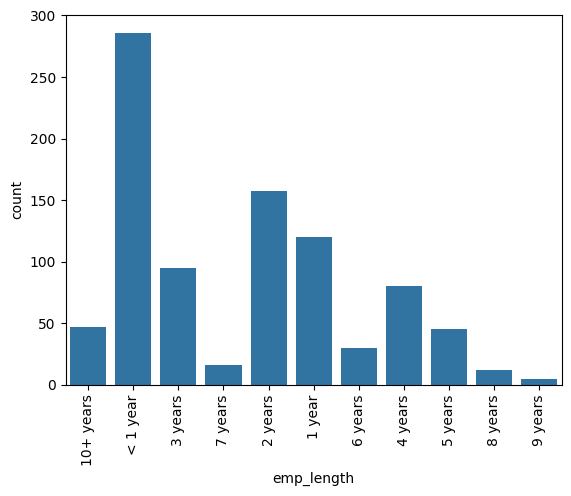

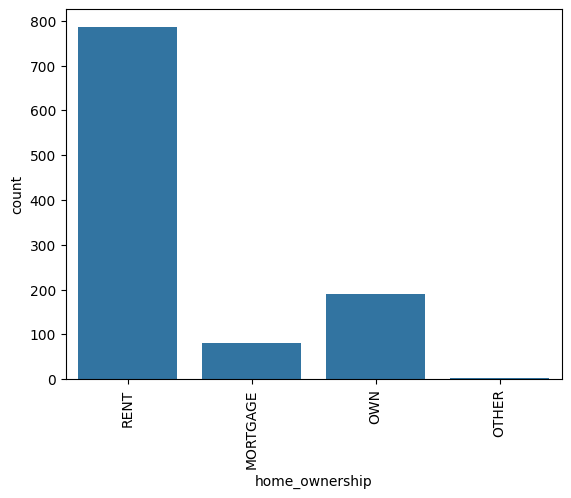

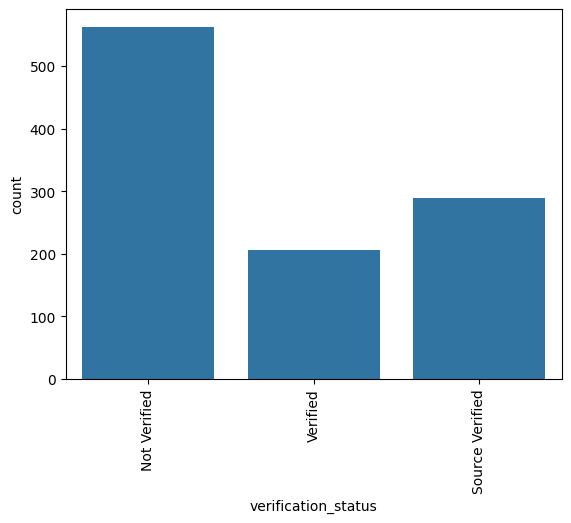

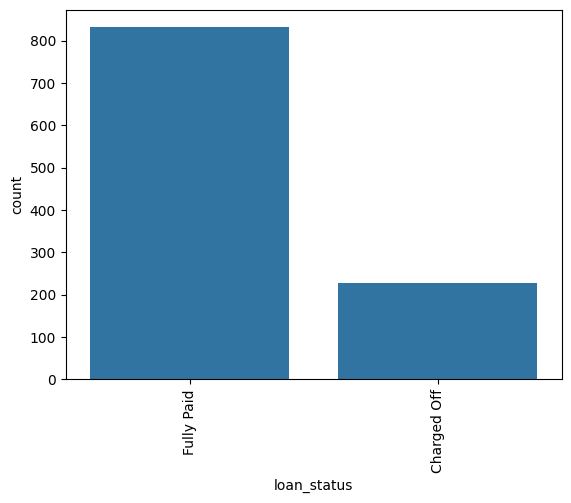

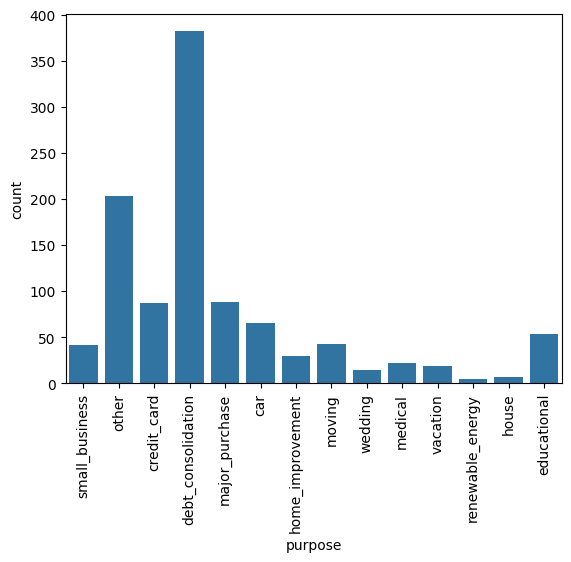

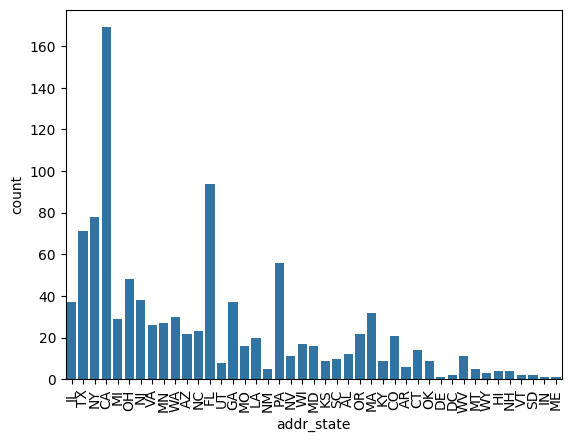

In [121]:
# For all categorical columns plot a countplot
for col in categorical_vars:
    #plt.figure(figsize=(12,5))
    sns.countplot(x=df2[col])
    plt.xticks(rotation=90)
    plt.show()

In [122]:
df2['loan_amnt'].describe()

,loan_amnt
count,1058.000000
mean,3777.055766
std,2044.274871
min,500.000000
25%,2150.000000
50%,3475.000000
75%,5000.000000
max,15000.000000


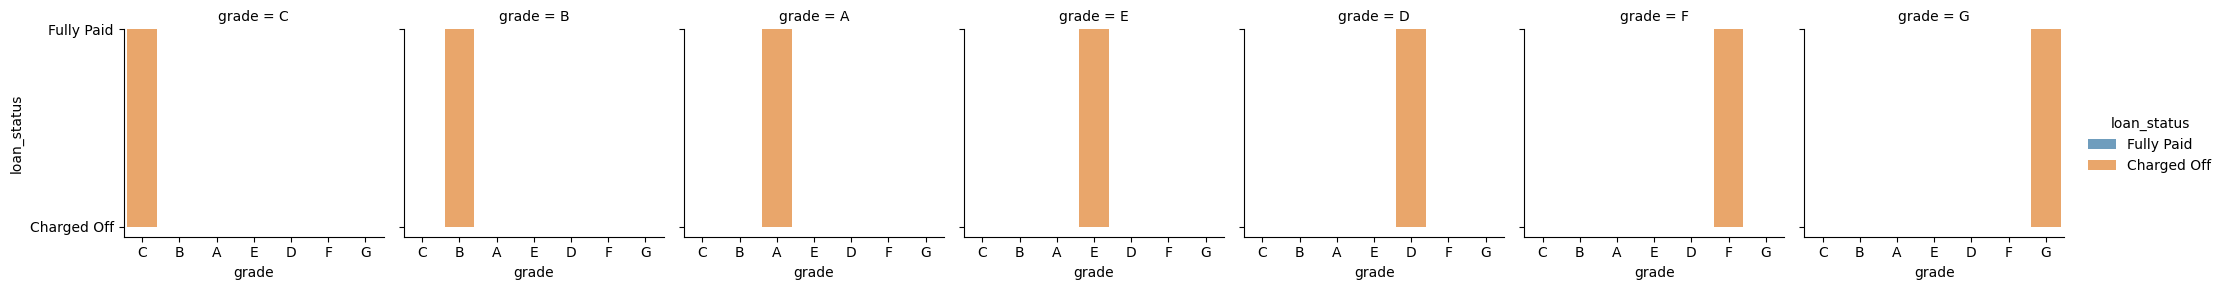

In [123]:
g = sns.FacetGrid(df2, col="grade", hue="loan_status")
g.map(sns.barplot, "grade", "loan_status", alpha=.7)
g.add_legend()
plt.show()

<Axes: xlabel='grade', ylabel='count'>

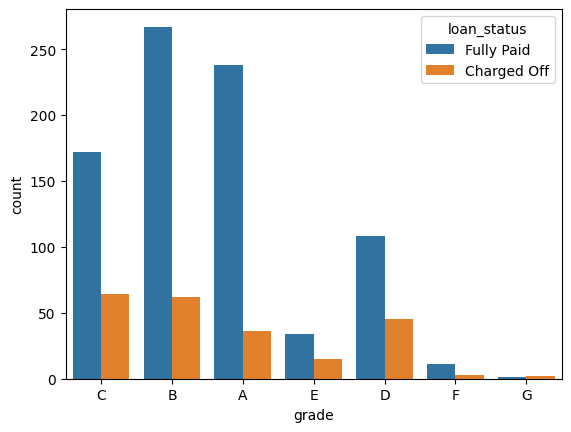

In [124]:
sns.countplot(x='grade', data=df2, hue='loan_status')